# 4장 이미지 프로세싱 기초

## 4.4 이미지 연산

### 4.4.1 영상과 영상의 연산

In [1]:
# 라이브러리 import
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 예제 4-13 영상의 사칙 연산(arithmetic.py)

# 연산에 사용할 배열 생성 --- (1)
a = np.uint8([[200, 50]])
b = np.uint8([[100, 100]])

# NumPy 배열 직접 연산 --- (2)
add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

# OpenCV API를 이용한 연산 --- (3)
add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a, 2)
div2 = cv2.divide(a, 3)

# 각 연산 결과 출력 --- (4)
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


1. cv2.add(a, b)에서 200 + 100 = 300이나, 이미지의 각 채널은 최대 255의 값을 갖기 때문에 255가 결과가 됨
2. cv2.subtract(a,b)에서 50 - 100 = -50이나, 이미지의 각 채널은 최소 0의 값을 갖기 때문에 0이 결과가 됨

In [3]:
# 예제 4-14 mask와 누적 할당 연산(arithmetic_mask.py)

# 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)
# 두 번째 요소가 0인 마스크 배열 생성 
mask = np.array([[1, 0]], dtype=np.uint8)

# 누적 할당과의 비교 연산
c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)

[[11  0]]
[[11 20]] [[10 20]]


1. c1에서 두 번째 요소의 결과로 2 + 20 = 22이어야 하지만, mask로 두 번째 요소가 0이기 때문에 결과가 0이 됨

2. c2에서는 누적할당을 사용했기 때문에 0 대신 b의 연산 이전 값 20을 갖게 됨, 단 b 역시 연산의 결과를 새로운 값으로 갖게 됨

### 4.4.2 알파 블렌딩

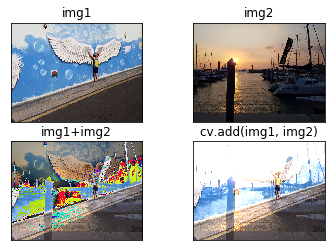

In [4]:
# 예제 4-15 이미지 단순 합성(blending_simple.py)

# 연산에 사용할 이미지 읽기
img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

# 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2) # OpenCV 함수

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

1. img1+img2에서 이상한 색을 띠고 있는 부분은 연산 시 픽셀 값이 255가 넘은 지점임

2. cv2.add(img1, img2)의 경우에도 전체적으로 하얀 픽셀을 띄어 좋은 결과가 아님

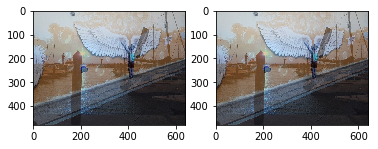

In [5]:
# 예제 4-16 50% 알파 블렌딩(blending_alpha.py)

alpha = 0.5 # 합성에 사용할 알파 값

# 합성에 사용할 영상 읽기 --- (1)
img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

# NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용 --- (2)
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함
plt.subplot(1, 2, 1)
plt.imshow(blended)

# addWeighted() 함수로 알파 블렌딩 적용 --- (3)
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0) 
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.show()

각 영상에 대해 50%의 가중치 부여(알파 블렌딩 또는  addWeight 사용)

In [6]:
# 예제 4-17 트랙바로 알파 블렌딩(blending_alpha_trackbar.py)

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# 합성 영상 읽기
img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')

# 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

트랙바를 이용해 알파 값을 조정할 수 있게 끔 함

### 4.4.3 비트와이즈 연산

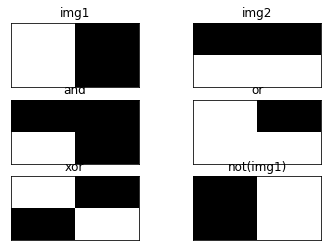

In [7]:
# 예제 4-18 비트와이즈 연산(bitwise.py)

# 연산에 사용할 이미지 생성
img1 = np.zeros( ( 200,400), dtype=np.uint8)
img2 = np.zeros( ( 200,400), dtype=np.uint8)
img1[:, :200] = 255         # 왼쪽은 검정색(0), 오른쪽은 흰색(255)
img2[100:200, :] = 255      # 위쪽은 검정색(0), 아래쪽은 흰색(255)

# 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

# Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [8]:
# 예제 4-19 bitwise_and 연산으로 마스킹하기(bitwise_masking.py)

# 이미지 읽기 --- (1)
img = cv2.imread('img/girl.jpg')

# 마스크 만들기 --- (2)
mask = np.zeros_like(img)
cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

# 마스킹 --- (3)
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.4.4  차영상

In [9]:
# 예제 4-20 차영상으로 도면의 차이 찾아내기(diff_absolute.py)

# 연산에 필요한 영상을 읽고 그레이스케일로 변환 --- (1)
img1 = cv2.imread('img/robot_arm1.jpg')
img2 = cv2.imread('img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 두 영상의 절대값 차 연산 --- (2)
diff = cv2.absdiff(img1_gray, img2_gray)

# 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환 --- (3)
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

# 두 번째 이미지에 변화 부분 표시 --- (4)
spot = cv2.bitwise_xor(img2, diff_red)

# 결과 영상 출력 --- (5)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

차영상을 통해 두 영상의 차이를 찾을 수 있음, 사람 눈으로 찾기 힘든 이미지 상의 차이를 표시

### 4.4.5 이미지 합성과 마스킹

In [10]:
# 예제 4-21 투명 배경 PNG 파일을 이용한 합성(addtion_rgba_mask.py)

# 합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('img/girl.jpg')

# 알파채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

# 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows() 

로고 이미지에서 마스크를 통해 전경 이미지를 추출하여 소녀 이미지에 합성

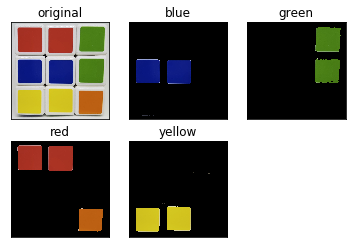

In [12]:
# 예제 4 - 22 HSV 색상으로 마스킹(hsv_color_mak.py)

# 큐브 영상 읽어서 HSV로 변환 --- (1)
img = cv2.imread("img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 색상별 영역 지정 --- (2)
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# 색상에 따른 마스크 생성 --- (3)
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

# 색상별 마스크로 색상만 추출 --- (4)
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

# 결과 출력 --- (5)
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

색상의 범위가 주어지면 이에 해당하는 픽셀을 추출(크로마 키의 원리)

In [13]:
# 예제 4-23 크로마 키 마스킹과 합성(chromakey.py)

# 크로마키 배경 영상과 합성할 배경 영상 읽기 --- (1)
img1 = cv2.imread('img/man_chromakey.jpg')
img2 = cv2.imread('img/street.jpg')

# ROI 선택을 위한 좌표 계산 --- (2)
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

# 크로마키 배경 영상에서 크로마키 영역을 10픽셀 정도로 지정 --- (3)
chromakey = img1[:10, :10, :]
offset = 20

# 크로마키 영역과 영상 전체를 HSV로 변경 --- (4)
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

# 크로마키 영역의 H값에서 offset 만큼 여유를 두어서 범위 지정 --- (5)
# offset 값은 여러차례 시도 후 결정
#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

# 마스크 생성 및 마스킹 후 합성 --- (6)
mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

# 결과 출력 --- (7)
cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

남성의 이미지에서 왼쪽 끝 10X10 영역의 색상값 중 가장 큰 값과 가장 작은 값을 색상의 범위로 지정하여 배경 제거 및 다른 이미지에 합성

In [ ]:
# 예제 4-24 SeamlessClone으로 합성(seamlessclone.py)

# 합성 대상 영상 읽기
img1 = cv2.imread("img/drawing.jpg")
img2= cv2.imread("img/my_hand.jpg")

# 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
# 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)
 
# seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

# 결과 출력
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

cv2.seamlessClone()함수를 사용하면 블렌딩을 위한 알파값이나 마스크를 알아내는 수고 없이 두 영상을 적절히 합성함

## 4.5 히스토그램


### 4.5.1 히스토그램 계산과 표시

hist.shape: (256, 1)
hist.sum(): 270000.0 img.shape: (450, 600)


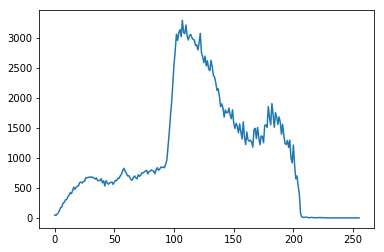

In [2]:
# 예제 4-25 그레이 스케일 1채널 히스토그램(histo_gray.py)

# 이미지 그레이 스케일로 읽기 및 출력 --- (1)
img = cv2.imread('img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)

# 히스토그램 계산 및 그리기 --- (2)
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

print("hist.shape:", hist.shape)  #--③ 히스토그램의 shape (256,1)
print("hist.sum():", hist.sum(), "img.shape:",img.shape) # 히스토그램 --- (3) 총 합계와 이미지의 크기
plt.show()

img를 1채널로 0부터 256 사이의 값으로 히스토그램을 구함, 이 때 계급(가로축)의 개수는 256개임

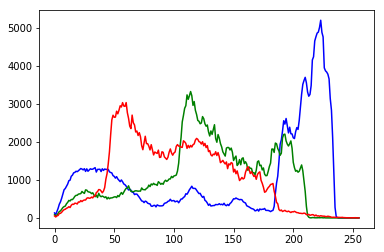

In [4]:
# 예제 4-26 컬러 히스토그램(histo_rgb.py)

# 이미지 읽기 및 출력 --- (1)
img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

# 히스토그램 계산 및 그리기 --- (2)
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 255])
    plt.plot(hist, color = color)
plt.show()

이미지를 r,g,b 채널로 나누어 각각 히스토그램을 그림 

### 4.5.2 노멀라이즈

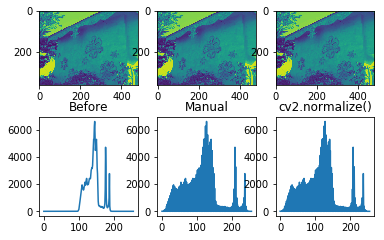

In [5]:
# 예제 4-27 히스토그램 정규화(hist_normalize.py)

# 그레이 스케일로 영상 읽기 --- (!)
img = cv2.imread('img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

# 직접 연산한 정규화 --- (2)
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

# OpenCV API를 이용한 정규화 --- (3)
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# 히스토그램 계산 --- (4)
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

plt.subplot(2,3,1)
plt.imshow(img)
plt.subplot(2,3,2)
plt.imshow(img_norm)
plt.subplot(2,3,3)
plt.imshow(img_norm2)

hists = {'Before' : hist, 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(2,3,i+4)
    plt.title(k)
    plt.plot(v)
plt.show()

### 4.5.3 이퀄라이저

(256,)


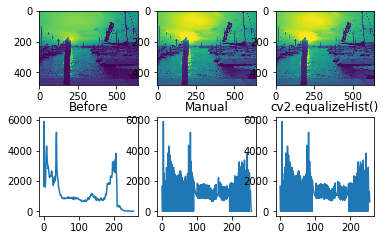

In [4]:
# 예제 4-28 그레이 스케일 이퀄라이저 적용(histo_equalize.py)

# 대상 영상으로 그레이 스케일로 읽기 --- (1)
img = cv2.imread('img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

# 이퀄라이즈 연산을 직접 적용 --- (2)
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) #히스토그램 계산
cdf = hist.cumsum()                                     # 누적 히스토그램 
cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255      # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑

# OpenCV API로 이퀄라이즈 히스토그램 적용 --- (3)
img3 = cv2.equalizeHist(img)

# 이퀄라이즈 결과 히스토그램 계산 --- (4)
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

# 결과 출력 --- (5)
plt.subplot(2,3,1)
plt.imshow(img)
plt.subplot(2,3,2)
plt.imshow(img2)
plt.subplot(2,3,3)
plt.imshow(img3)

hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(2,3,i+4)
    plt.title(k)
    plt.plot(v)
plt.show()


이미지의 히스토그램이 비교적 고르게 됨

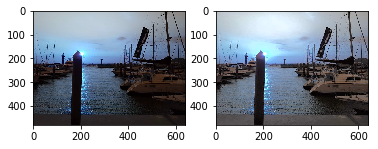

In [8]:
# 예제 4-29 컬러 이미지에 대한 이퀄라이즈 적용(histo_equalize_yuz.py)

img = cv2.imread('img/yate.jpg') #이미지 읽기, BGR 스케일

# 컬러 스케일을 BGR에서 YUV로 변경 --- (1)
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 

# YUV 컬러 스케일의 첫번째 채널에 대해서 이퀄라이즈 적용 --- (2)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 

# 컬러 스케일을 YUV에서 BGR로 변경 --- (3)
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img2)

배의 어두운 부분이 밝아짐

### 4.5.4 CLAHE

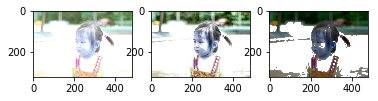

In [10]:
# 예제 4-30  CLAHE 적용 (histo_clahe.py)

# 이미지 읽어서 YUV 컬러스페이스로 변경 --- (1)
img = cv2.imread('img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# 밝기 채널에 대해서 이퀄라이즈 적용 --- (2)
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

# 밝기 채널에 대해서 CLAHE 적용 --- (3)
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

# 결과 출력 --- (4)
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(img_clahe)
plt.subplot(1, 3, 3)
plt.imshow(img_eq)
plt.show()

CLAHE는 밝은 이미지에 이퀄라이즈를 적용했을 때 밝은 부분이 날아가는 것을 방지해줌

### 4.5.5 2D 히스토그램

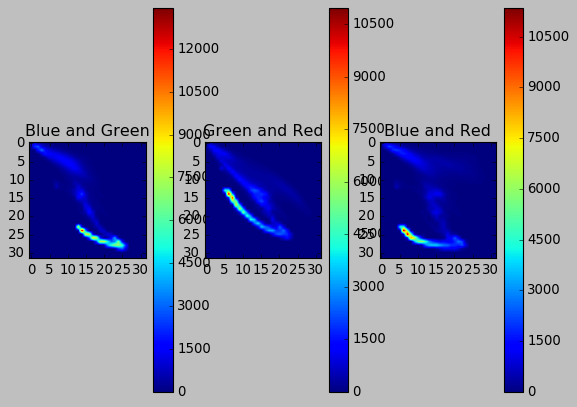

In [11]:
# 예제 4-31 2D 히스토그램(histo_2d.py)

plt.style.use('classic')            # 컬러 스타일을 1.x 스타일로 사용 --- (1)
img = cv2.imread('img/mountain.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256]) # --- (2)
p = plt.imshow(hist)                                            # --- (3)
plt.title('Blue and Green')                                     # --- (4)
plt.colorbar(p)                                                 # --- (5)


plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256]) # --- (6)
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256]) # --- (7)
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

### 4.5.6 역투영

In [2]:
# 예제 4-32 마우스로 선택한 영역의 물체 배경 제거(histo_backproject.py)

win_name = 'back_projection'
img = cv2.imread('img/pump_horse.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

# 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수 --- (5)
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

# 직접 구현한 역투영 함수 --- (6)
def backProject_manual(hist_roi):
    # 전체 영상에 대한 H,S 히스토그램 계산 --- (7)
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    # 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산 --- (8)
    hist_rate = hist_roi/ (hist_img + 1)
    # 비율에 맞는 픽셀 값 매핑 --- (9)
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    # 역 투영 결과로 마스킹해서 결과 출력 --- (10)
    masking(bp,'result_manual')
    
# OpenCV API로 구현한 함수 --- (11)
def backProject_cv(hist_roi):
    # 역투영 함수 호출 --- (!2)
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 --- (13) 
    masking(bp,'result_cv')

# ROI 선택 --- (1)
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    # 선택한 ROI를 HSV 컬러 스페이스로 변경 --- (2)
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    # H,S 채널에 대한 히스토그램 계산 --- (3)
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    # ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달 --- (4)
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5.7 히스토그램 비교

CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


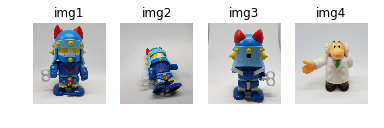

In [2]:
# 예제 4-33 히스토그램 비교(histo_compare.py)

img1 = cv2.imread('img/taekwonv1.jpg')
img2 = cv2.imread('img/taekwonv2.jpg')
img3 = cv2.imread('img/taekwonv3.jpg')
img4 = cv2.imread('img/dr_ochanomizu.jpg')

# cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    # 각 이미지를 HSV로 변환 --- (1)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # H,S 채널에 대한 히스토그램 계산 --- (2)
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    # 0~1로 정규화 --- (3)
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        # 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교 --- (4)
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

## 4.6 실전 워크숍

### 4.6.1 반해골 괴물 얼굴 합성

In [3]:
# 예제 4-34 반해골 괴물 얼굴 합성 풀이(workshop_two_face.py)

# 영상의 15%를 알파 블렌딩의 범위로 지정
alpha_width_rate = 15

# 합성할 두 영상 읽기
img_face = cv2.imread('img/man_face.jpg')
img_skull = cv2.imread('img/skull.jpg')

# 입력 영상과 같은 크기의 결과 영상 준비
img_comp = np.zeros_like(img_face)

# 연산에 필요한 좌표 계산
height, width = img_face.shape[:2]
middle = width//2                             # 영상의 중앙 좌표
alpha_width = width * alpha_width_rate // 100 # 알파 블렌딩 범위
start = middle - alpha_width//2               # 알파 블렌딩 시작 지점
step = 100/alpha_width                        # 알파 값 간격

# 입력 영상의 절반씩 복사해서 결과 영상에 합성
img_comp[:, :middle, : ] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()
cv2.imshow('half', img_comp)

# 알파 값을 바꾸면서 알파 블렌딩 적용
for i in range(alpha_width+1 ):
    alpha = (100 - step * i) / 100  # 증감 간격에 따른 알파 값 (1~0)
    beta = 1 - alpha                # 베타 값 (0~1)
    # 알파 블렌딩 적용
    img_comp[:, start+i] = img_face[:, start+i] * \
                                alpha + img_skull[:, start+i] * beta
    print(i, alpha, beta)
    
cv2.imshow('half skull', img_comp)
cv2.waitKey()
cv2.destroyAllWindows()

0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.7291666666666665 0.2708333333333335
27 0.71875 0.28125
28 0.7083333333333333 0.29166666666666674
29 0.6979166666666665 0.3020833333333335
30 0

남성 얼굴 이미지와 해골이미지를 절반씩 가져다 붙이되, 중간 부분을 알파 블랜딩 하여 자연스럽게 합성하도록 함

### 4.6.2 모션 감지 CCTV

In [4]:
# 예제 4-35 모션 감지 CCTV 풀이(wrokshop_cctv_motion_sensor.py)

# 감도 설정(카메라 품질에 따라 조정 필요)
thresh = 25    # 달라진 픽셀 값 기준치 설정
max_diff = 5   # 달라진 픽셀 갯수 기준치 설정

# 카메라 캡션 장치 준비
a, b, c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)      # 프레임 폭을 480으로 설정 
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)     # 프레임 높이를 320으로 설정

if cap.isOpened():
    ret, a = cap.read()         # a 프레임 읽기
    ret, b = cap.read()         # b 프레임 읽기

    while ret:
        ret, c = cap.read()     # c 프레임 읽기
        draw = c.copy()         # 출력 영상에 사용할 복제본
        if not ret:
            break
        
        # 3개의 영상을 그레이 스케일로 변경
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

        # a-b, b-c 절대 값 차 구하기 
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)

        # 스레시홀드로 기준치 이내의 차이는 무시
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

        # 두 차이에 대해서 AND 연산, 두 영상의 차이가 모두 발견된 경우
        diff = cv2.bitwise_and(diff1_t, diff2_t)

        # 열림 연산으로 노이즈 제거 --- (1)
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

        # 차이가 발생한 픽셀이 갯수 판단 후 사각형 그리기
        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)  # 0이 아닌 픽셀의 좌표 얻기(y[...], x[...])
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])), \
                                (max(nzero[1]), max(nzero[0])), (0,255,0), 2)
            cv2.putText(draw, "Motion Detected", (10,30), \
                                cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255))
        
        # 컬러 스케일 영상과 스레시홀드 영상을 통합해서 출력
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor',stacked )

        # 다음 비교를 위해 영상 순서 정리
        a = b
        b = c
        
        if cv2.waitKey(1) & 0xFF == 27:
            break

프레임 간의 차이로 움직임 감지